<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/wandb_optimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
from datetime import datetime

In [57]:
! pip install wandb -qqq
import wandb
wandb.login()

PROJECT = 'opt_{}'.format(datetime.now().strftime('%y%m%d'))

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


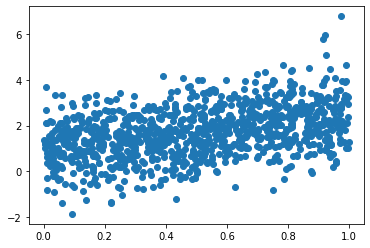

In [55]:
N_SAMPLES = 100000
x = np.random.rand(N_SAMPLES)
y = np.exp(x) + np.random.normal(size=N_SAMPLES)

def plot(x, y, y_pred=None):
    s = len(x) // 1000
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x[::s], y[::s])
    if y_pred is not None:
        ax.scatter(x[::s], y_pred[::s], c='r')

plot(x, y)

In [56]:
X0 = np.random.rand(4)

def pred(x, pars):
    a, b, c, d = pars
    return a + b * np.exp(c * x + d)

def mse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    return np.mean(se)

def loss(pars):
    y_pred = pred(x, pars)
    _loss = mse(y, y_pred)
    wandb.log({'loss': _loss})
    return _loss

def fit_least_squares(x, y, x0):
    name='least_squares_{}'.format(datetime.now().strftime('%H%M%S'))
    wandb.init(project=PROJECT, name=name)
    res = opt.least_squares(fun, x0)
    print(res)
    plot(x, y, pred(x, res.x))
    return 

loss,1.0018
_step,1987
_runtime,15
_timestamp,1609164109


loss,█▄▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇█
_timestamp,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇█


 active_mask: array([0., 0., 0., 0.])
        cost: 0.5019345450568656
         fun: array([1.00193268])
        grad: array([ 0.00048334, -0.00147593,  0.00023498, -0.00053234])
         jac: array([[ 0.00048241, -0.00147308,  0.00023453, -0.00053132]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 400
        njev: 398
  optimality: 0.0014759310885261575
      status: 0
     success: False
           x: array([0.26139975, 0.3604115 , 1.19416487, 0.7433199 ])


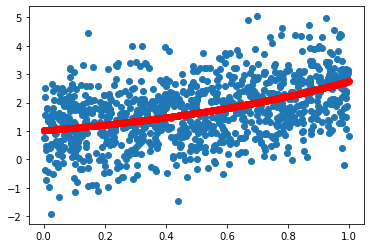

In [53]:
def fit_least_squares(x, y, x0):
    wandb.init(
        project='opt_{}'.format(datetime.now().strftime('%y%m%d')), 
        name='least_squares_{}'.format(datetime.now().strftime('%H%M%S'))
    )
    def fun(pars):
        y_pred = pred(x, pars)
        loss = mse(y, y_pred)
        wandb.log({'loss': loss})
        return loss
    res = opt.least_squares(fun, x0)
    print(res)
    plot(x, y, pred(x, res.x))
    return 
    
fit_least_squares(df['x'], df['y'], X0)

loss,1.00193
_step,1991
_runtime,14
_timestamp,1609164163


loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_timestamp,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██


      fun: 1.0017735984107377
 hess_inv: array([[ 340.86299432,  -65.02904855,  192.05805369, -144.07258236],
       [ -65.02904855,   12.53398815,  -37.02628632,   27.39059628],
       [ 192.05805369,  -37.02628632,  110.58903871,  -81.74481766],
       [-144.07258236,   27.39059628,  -81.74481766,   61.71192292]])
      jac: array([-1.31130219e-06, -4.41074371e-06,  5.06639481e-07, -2.48849392e-06])
  message: 'Optimization terminated successfully.'
     nfev: 174
      nit: 24
     njev: 29
   status: 0
  success: True
        x: array([-0.03088707,  0.40172726,  0.99428182,  0.93492148])


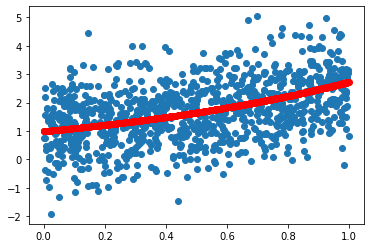

In [54]:
def fit_minimize(x, y, x0):
    wandb.init(
        project='opt_{}'.format(datetime.now().strftime('%y%m%d')), 
        name='minimize_{}'.format(datetime.now().strftime('%H%M%S'))
    )
    def fun(pars):
        y_pred = pred(x, pars)
        loss = mse(y, y_pred)
        wandb.log({'loss': loss})
        return loss
    res = opt.minimize(fun, x0)
    print(res)
    plot(x, y, pred(x, res.x))
    return 
    
fit_minimize(df['x'], df['y'], X0)

a,0.99965
b,1.0006
loss,0.03055
_step,569
_runtime,29
_timestamp,1608830511


a,▆▄▂▃▅█▂▂▂▁▃▁▂▂▂▂▁▁▁▂▂▂▂▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂
b,▄▂▇█▁█▂▁▇▆▆▁▂▂▂▁▃▂▃▂▁▂▂▃▃▄▆▂▇▂▂▂▂▂▂▂▂▂▂▂
loss,▃▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██


[0.99963439 1.00063703]


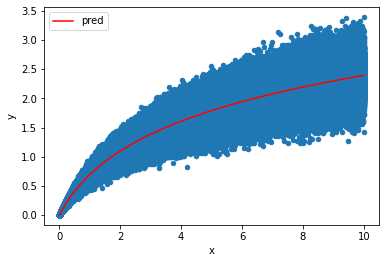

In [ ]:
pars = fit(df['x'], df['y'], 'dual_ann', bounds=[[0, 10], [0, 10]])
print(pars)

df['pred'] = pred(df['x'], pars)
ax = df.plot(x='x', y='y', kind='scatter')
df.plot(x='x', y='pred', ax=ax, c='r')

In [ ]:
time()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


()

In [ ]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

now = 2020-12-24 16:49:08.829507
date and time = 24/12/2020 16:49:08
